In [1]:
import cv2
from darkflow.net.build import TFNet

import matplotlib.pyplot as plt
% config InlineBackend.figure_format = 'svg' 

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
options = { 
    'model' : 'cfg/yolo.cfg',
    'load' : 'bin/yolov2.weights',
    'threshold' :0.3 ,
    'cpu' : 0.8
}

In [7]:
tfnet  = TFNet(options)

Parsing cfg/yolo.cfg


C:\darkflow-master\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.08397603034973145s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,

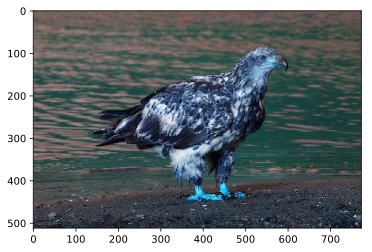

In [32]:
img = cv2.imread('img12.jpg', cv2.IMREAD_COLOR)
plt.imshow(img)
plt.show()

In [33]:
result = tfnet.return_predict(img)
result

[{'label': 'bird',
  'confidence': 0.9507775,
  'topleft': {'x': 130, 'y': 49},
  'bottomright': {'x': 642, 'y': 466}}]

In [34]:
top_left = (result[0]['topleft']['x'] , result[0]['topleft']['y'])
bottom_right = (result[0]['bottomright']['x'] , result[0]['bottomright']['y'])

In [35]:
print(top_left)
print(bottom_right)

(130, 49)
(642, 466)


In [36]:
label = result[0]['label']
label    

'bird'

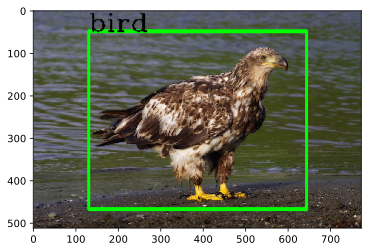

In [37]:
img = cv2.rectangle(img , top_left , bottom_right , (0,255,0) , 8)
img = cv2.putText(img , label ,top_left ,cv2.FONT_HERSHEY_COMPLEX , 2 , (0,0,0) ,2 )
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()